# K-Means

Capaian Pembelajaran
1. Mahasiswa dapat menjelaskan konsep K-Means untuk klasterisasi data
2. Mahasiswa dapat menerapkan K-Means pada kasus dunia nyata

## Sekilas tentang k-Means
k-Means adalah salah satu algoritma klasterisasi yang termasuk dalam jenis algoritma unsupervised. Algoritma ini memiliki fungsi untuk mempelajari properti data yang berupa label kelompok data yang bersifat diskrit (jelas dan countable)

## Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Pengantar k-Means

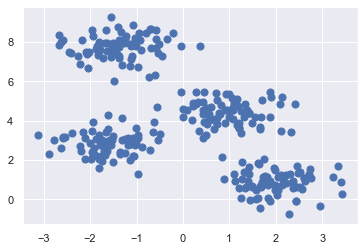

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

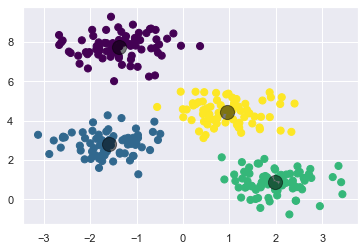

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation-Maximization

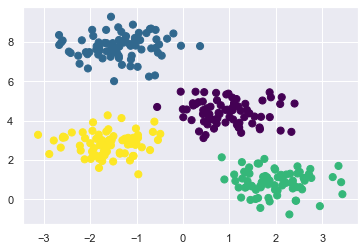

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Perubahan random

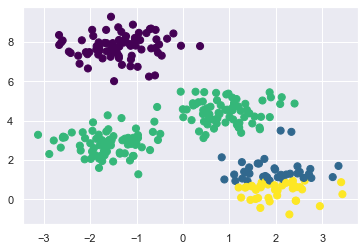

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Optimalisasi Jumlah Klaster

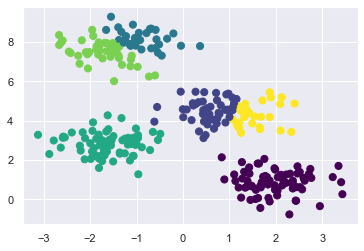

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Batas Klaster yang Tidak Selalu Linier

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

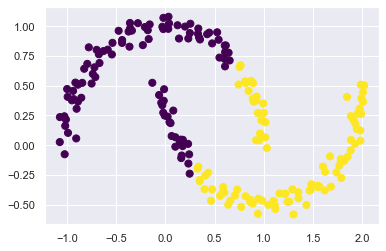

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

c:\Users\SAFIRA\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


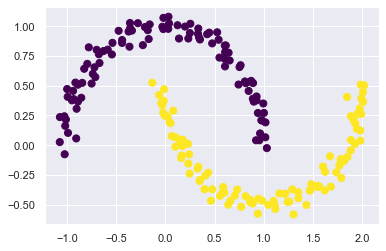

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh Kasus 1: Karakter Angka

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

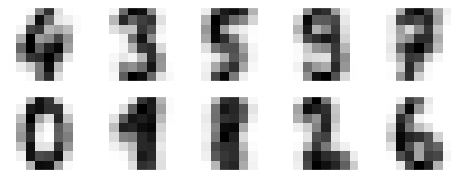

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

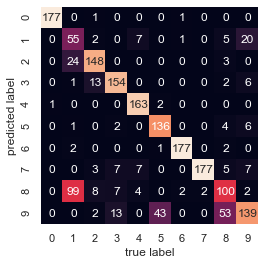

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9348914858096828

## Studi Kasus 2: Kompresi Citra

In [33]:
import matplotlib.pyplot as plt 
img_dir = 'doge.jpg'

In [35]:
# matplotlib
print('plt.imread()')
img1 = plt.imread(img_dir)
print(type(img1))#np.array
print(img1.shape)
print('\n')

plt.imread()
<class 'numpy.ndarray'>
(804, 557, 3)




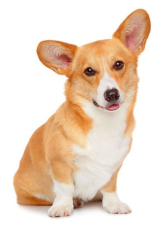

In [36]:
# from sklearn.datasets import load_sample_image
# flower = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img1);

In [19]:
img1.shape

(427, 640, 3)

In [20]:
data = img1 / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [37]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

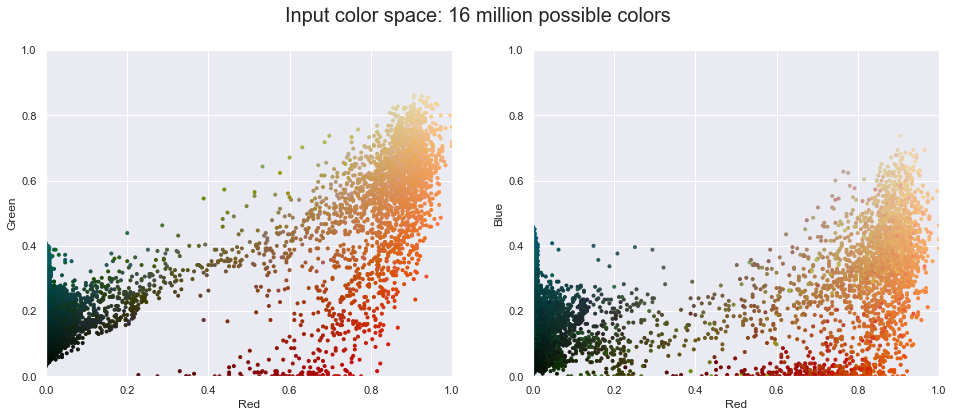

In [38]:
plot_pixels(data, title='Input color space: 16 million possible colors')

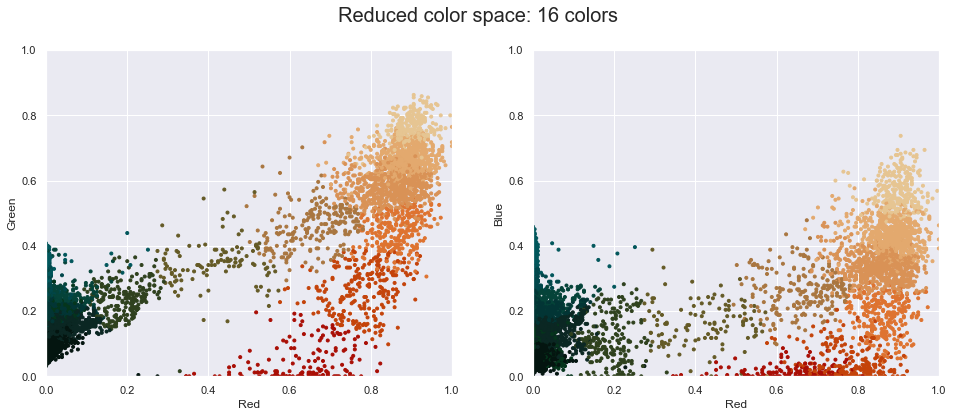

In [39]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

In [61]:
img1_recolored = new_colors.reshape(img1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img1)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img1_recolored)
ax[1].set_title('16-color Image', size=16);

AttributeError: 'numpy.ndarray' object has no attribute 'fromarray'

## Elbow Method- Within-Cluster-Sum of Squared Errors (WSS)

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [47]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.clustercenters
    pred_clusters = kmeans.predict(points)
    curr_sse = 0


    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) == 2 + (points[i, 1] - curr_center[1]) == 2

    sse.append(curr_sse)
  return sse

In [49]:
def calculate_WSS0(x, centroids, pred_clusters):
    curr_sse = 0
    
    for i in range(len(x)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (x[i, 0] - curr_center[0]) ** 2 + (x[i, 1] - curr_center[1]) ** 2
    return curr_sse

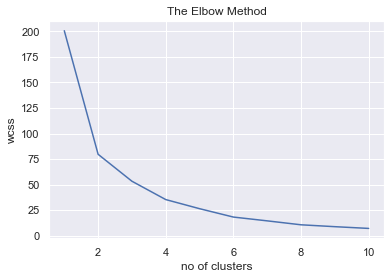

In [44]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [50]:
def calculate_Silhouette0(x, labels):
    return silhouette_score(x, labels, metric='euclidean')


sse = []
sil = []
kmax = 4

x, y = make_blobs(n_samples = 10, centers = 4, n_features=3, shuffle=True, random_state=31)
print(type(x))
print('data ', x)
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(x)

  sil.append(calculate_Silhouette0(x, labels))
  sse.append(calculate_WSS0(x, centroids, pred_clusters))

print('Silhouette_score ', sil)
print('Elbow_score ', sse)

<class 'numpy.ndarray'>
data  [[11.27188606 -3.85925673 -7.69678536]
 [-4.3649656   9.45004463  5.27487212]
 [ 9.16547107 -6.5372568  -8.19676526]
 [ 9.39602582 -7.59529807 -7.21054155]
 [ 8.03292415 -8.83679438 -9.26019571]
 [-5.05604381 11.01146785  4.70065833]
 [ 8.20744648 -8.01545167 -8.75717086]
 [ 0.77858223 -8.62867468 -2.57195258]
 [ 1.38797354 -7.52529931 -1.25167879]
 [-5.26166772  8.24332004  6.60569313]]
Silhouette_score  [0.7711727226509476, 0.7858857156579735, 0.6541562060907241]
Elbow_score  [122.81206331685345, 26.59934442980851, 9.22292330117527]
